# Graded Exercise 2: Anomaly Detection on Acoustic Data

- **Course**: [CIVIL-426 - Machine Learning for Predictive Maintenance](https://edu.epfl.ch/coursebook/en/machine-learning-for-predictive-maintenance-applications-CIVIL-426)
- **Start Date**: 2024.10.03 at 10:15
- **Due Date**: 2024.10.23 at 23:59
- **Student 0**:
    - Name: `Viktor Kjellsson`
    - SCIPER: `396 802`
- **Student 1**:
    - Name: `Mathis Magnin`
    - SCIPER: `327 838`

# Introduction
Anomalous sound detection (ASD) refers to the task of identifying whether the sounds emitted from a target machine are normal or anomalous.
In real-world industrial environments, anomalies are infrequent and can exhibit significant variability, making it impractical to build an exhaustive set of anomalous sound patterns.
As a result, our goal is to detect anomalous sounds using only normal sound clips for training.

This challenge cannot be approached as a simple classification problem (anomaly vs healthy). Instead, it is formulated as a **one-class classification** problem, where the model is trained on normal sound data to detect deviations from the learned pattern.

Anomalous sound detection can be achieved with following steps:
   - Feature Extraction (I)
   - One-class Classifier Training (II)
   - Decisions based on a threshold from your trained classifier (III)
   
Through this assignment, you will primarily focus on tasks (I) and (II).
The quality of your one-class classifier will be assessed using the **Area Under the Curve (AUC)** score on the test dataset.

The model used here is a type of neural network called **AutoEncoder** (AE). AE is trained to reconstruct the input data while compressing the input data into a lower-dimensional latent space and minimizing information loss during this process.
Thus, you will also modify the extracted features and Neural Network used in this notebook to improve the anomalous sound detection performance.

The dataset is composed of two different machines, a Pump and a Valve. For each machine you have:
- A **training dataset** composed of *only healthy* sound data
- A **test dataset** composed of *both healthy and abnormal* sound data

# Questions:

Your task is to improve the anomalous sound detection performance by modifying the feature extraction process and neural network architecture. You are expected to experiment with various feature representations and neural network configurations to optimize detection results.

Specifically, the following questions must be addressed. Each question should be discussed separately for both the Pump and Valve datasets. The answers are to be provided in a PDF report, and the full Jupyter notebook must also be submitted.

**Question 1:** Given the provided code, fill in the blank spaces to extract signal features, train a simple AutoEncoder that reconstructs the inputs MEL-Spectogram, and report the AUC score.

**Question 2:** From the trained AutoEncoder, use the bottleneck features to train both (1) a One-Class SVM and (2) an Isolation Forest, and report the corresponding AUC scores.

**Question 3:** Instead of using AutoEncoder features, apply PCA to project the MEL-spectrogram into a smaller dimensional space, then train (1) a One-Class SVM and (2) an Isolation Forest, and report the AUC scores.

**Question 4:** Determine an appropriate threshold for distinguishing anomalies based on the given results, and compute the following metrics: Accuracy, True Positive Rate (TPR), False Positive Rate (FPR), and F1-score.

**Question 5:** Visualize essential steps and provide a thorough discussion of the results obtained from all the methods.  

**Bonus Question:** Modify the AutoEncoder architecture to a 2D AutoEncoder using convolutional layers instead of fully connected layers, and analyze its performance.

## Download Dataset

In [ ]:
%pip install gdown --upgrade --quiet
import gdown

In [2]:
# Pump Dataset
gdown.download(id='1ZAqnNW2gnHDyFHGHk3Aru7k-ng-BTpGn', output="./dev_data_pump_04.zip")

Downloading...
From (original): https://drive.google.com/uc?id=1ZAqnNW2gnHDyFHGHk3Aru7k-ng-BTpGn
From (redirected): https://drive.google.com/uc?id=1ZAqnNW2gnHDyFHGHk3Aru7k-ng-BTpGn&confirm=t&uuid=81ae7c30-fc41-4c13-8b50-286f22f439c1
To: /Users/mathis/CIVIL426_2/dev_data_pump_04.zip
100%|██████████| 199M/199M [00:13<00:00, 14.3MB/s] 


'./dev_data_pump_04.zip'

In [3]:
# Valve Dataset
gdown.download(id='1H_SS7qteLcd44e5CD9CFJjhJ573FAb6M', output="./dev_data_valve_00.zip")

Downloading...
From (original): https://drive.google.com/uc?id=1H_SS7qteLcd44e5CD9CFJjhJ573FAb6M
From (redirected): https://drive.google.com/uc?id=1H_SS7qteLcd44e5CD9CFJjhJ573FAb6M&confirm=t&uuid=370f353b-b336-4eb8-94a6-4fe1e2d176cc
To: /Users/mathis/CIVIL426_2/dev_data_valve_00.zip
100%|██████████| 269M/269M [00:16<00:00, 16.3MB/s] 


'./dev_data_valve_00.zip'

In case that above links do not work, you can also manully download the dataset here:
- **dev_data_pump_04.zip**: https://docs.google.com/uc?export=download&id=1ZAqnNW2gnHDyFHGHk3Aru7k-ng-BTpGn
- **dev_data_valve_00,zip**: https://docs.google.com/uc?export=download&id=1H_SS7qteLcd44e5CD9CFJjhJ573FAb6M

In [4]:

!unzip dev_data_pump_04.zip
!unzip dev_data_valve_00.zip


Archive:  dev_data_pump_04.zip
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000000.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000001.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000002.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000003.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000004.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000005.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000006.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000007.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000008.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000009.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000010.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000011.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000012.wav  
  inflating: dev_data_pump_04/pump/test/anomaly_id_04_00000013.wav  
  i

In [5]:
import os
import sys
import librosa
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm

In [6]:
# Define a subfolder in the current project directory
output_dir = 'Figures_Valve' # Figures_Pump or Figures_Valve

# Create the subfolder if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

## Audio Data Loading and MEL-Spectrogram Feature Extraction

The code is adapted from https://github.com/MIMII-hitachi/mimii_baseline

Copyright (C) 2019 Hitachi, Ltd. All right reserved.

Harsh Purohit, Ryo Tanabe, Kenji Ichige, Takashi Endo, Yuki Nikaido, Kaori Suefusa, and Yohei Kawaguchi, "MIMII Dataset: Sound Dataset for Malfunctioning Industrial Machine Investigation and Inspection," arXiv preprint arXiv:1909.09347, 2019.

In [7]:
########################################################################
# import additional python-library
########################################################################
import librosa.core
import librosa.feature

# WAV File Input
def load_wav_files(wav_file_name, mono=True):
    """Load a .wav file."""
    try:
        return librosa.load(wav_file_name, sr=None, mono=mono)
    except Exception as e:
        print(f"Failed to load file '{wav_file_name}'. Error: {e}")
        raise

def demux_wav_files(wav_file_name, channel=0):
    """Demux a .wav file and return a specific channel."""
    try:
        multi_channel_data, sr = load_wav_files(wav_file_name, mono=False)
        if multi_channel_data.ndim == 1:
            return sr, multi_channel_data
        return sr, multi_channel_data[channel, :]
    except ValueError as e:
        print(f"Error in demuxing file '{wav_file_name}': {e}")
        raise

# Feel free to modify and analysis the images in your report
def plot_signals(tmin, tmax, sr, y, emphasized_y, log_mel_spectrogram):
    # Raw Signal
    plt.figure(1)
    n = len(y)
    t = np.linspace(tmin, tmax, n)
    plt.plot(t, y)
    plt.xlim(t[0],t[-1])
    plt.xlabel('time/s',fontsize=20)
    plt.ylabel('Amplitude',fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid()
    # load the figure
    file_path = os.path.join(output_dir, 'raw_pump.png')
    plt.savefig(file_path, dpi=300)
    
    #FFT
    plt.figure(2)
    freq = sr/n*np.linspace(0,n/2,int(n/2)+1)
    plt.plot(freq,np.absolute(np.fft.rfft(y[tmin*sr:tmax*sr],n)**2)/n)
    plt.xlim(0,5000)
    plt.xlabel('Frequency/Hz',fontsize=14)
    # load the figure
    file_path = os.path.join(output_dir, 'fft_pump.png')
    plt.savefig(file_path, dpi=300)
    
    # FFT emphasized
    plt.figure(3)
    plt.plot(freq,np.absolute(np.fft.rfft(emphasized_y,n)**2)/n)
    plt.xlim(0,5000)
    plt.xlabel('Frequency/Hz',fontsize=14)
    # load the figure
    file_path = os.path.join(output_dir, 'fft_em_pump.png')
    plt.savefig(file_path, dpi=300)
    
    # Spectogram
    plt.figure(4)
    librosa.display.specshow(log_mel_spectrogram)
    plt.colorbar()
    # load the figure
    file_path = os.path.join(output_dir, 'spectro_pump.png')
    plt.savefig(file_path, dpi=300)

########################################################################
# Feature Extractor
########################################################################
def file_to_features(file_name,
                     n_mels=64,
                     frames=5,
                     n_fft=1024,
                     hop_length=512,
                     power=2.0,
                     plot=True):
    """Convert a WAV file to a vector array."""
    # Step 01: Load the demuxed wav files
    sr, y = demux_wav_files(file_name, channel=0)
    
    # Step 02: Signal Pre-emphasis
    tmin = int(0)
    tmax = int(len(y)/sr)
    alpha = 0.95
    emphasized_y = np.append(y[0],
                             y[1:] - alpha*y[:-1])
    
    # Step 03: Generate MEL-Spectrogram
    # ===================================
    # IMPLEMENT YOUR CODE HERE
    S = librosa.feature.melspectrogram(y=emphasized_y, sr=sr, n_fft=n_fft, hop_length=hop_length,power=power, n_mels=n_mels)
    # ===================================

    # Step 04: Convert MEL-Spectrogram to log scale
    # ===================================
    # IMPLEMENT YOUR CODE HERE
    log_mel_spectrogram = librosa.power_to_db(S=S)
    # ===================================
    
    
    # Step 05: Define Feature Vector Array
    dims = n_mels * frames
    length = len(log_mel_spectrogram[0,:]) - frames + 1
    features = np.zeros((length, dims), float)
    
    # Pad short clips instead of skipping
    if length < 1:
        print(f"Audio file '{file_name}' is too short. Padding applied.")
        log_mel_spectrogram = np.pad(log_mel_spectrogram, ((0, 0), (0, frames - 1)), mode='constant')
        length = 1
    
    for t in range(frames):
        features[:, n_mels * t: n_mels * (t + 1)] = log_mel_spectrogram[:, t: t + length].T
    
    if plot:
        plot_signals(tmin, tmax, sr, y, emphasized_y, log_mel_spectrogram)
    return features

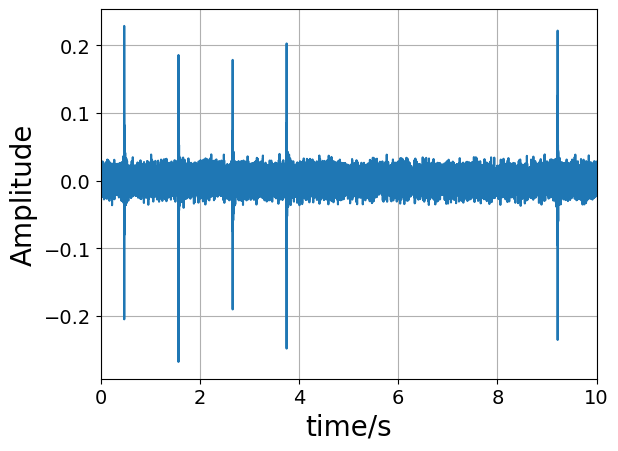

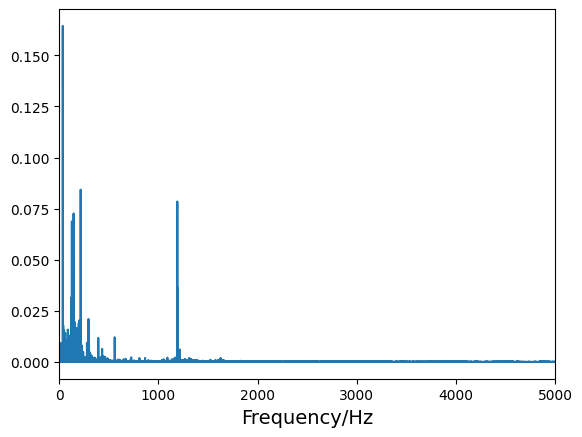

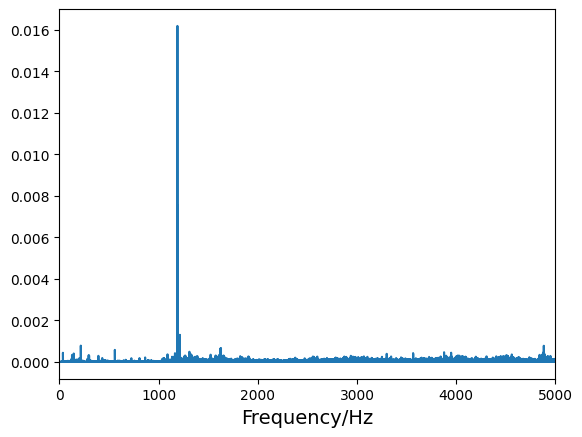

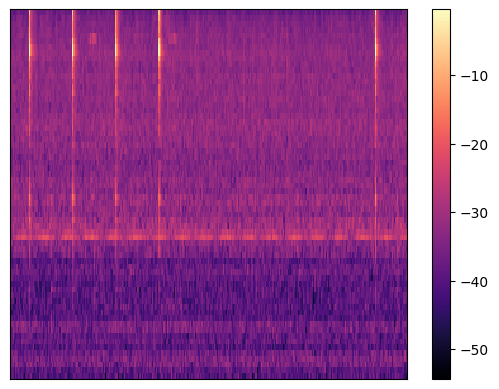

In [8]:
# wav_test_file = 'dev_data_pump_04/pump/train/normal_id_04_00000000.wav'
# wav_test_file = 'dev_data_pump_04/pump/test/anomaly_id_04_00000000.wav'

wav_test_file = 'dev_data_valve_00/valve/train/normal_id_00_00000000.wav'
# wav_test_file = 'dev_data_valve_00/valve/test/anomaly_id_00_00000000.wav'

# Visualize your results for potential analysis in your report
features = file_to_features(wav_test_file)

## PyTorch Dataset Splitting

To define and optimize a neural network, we will use the library [PyTorch](http://pytorch.org).

In [9]:
DATA_PATH = "."
MACHINE = "valve_00" # Choose between  "valve_00" or "pump_04" 

In [10]:
class MIMII(Dataset):
    def __init__(self, root, machine, train=True, transform=None, target_transform=None):
        if train:
            self.audio_path = os.path.join(root, f"dev_data_{machine}", machine.split("_")[0], "train")
            self.audio_files = os.listdir(self.audio_path)
            self.labels = [int(f.split("_")[0] == "anomaly") for f in self.audio_files]
        else:
            self.audio_path = os.path.join(root, f"dev_data_{machine}", machine.split("_")[0], "test")
            self.audio_files = os.listdir(self.audio_path)
            self.labels = [int(f.split("_")[0] == "anomaly") for f in self.audio_files]
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.audio_files)

    def __getitem__(self, idx):
        file_path = os.path.join(self.audio_path, self.audio_files[idx])
        label = self.labels[idx]
        if self.transform:
            f = self.transform(file_path)
        else:
            # default feature representation
            f = file_to_features(file_path).astype(np.float32)
        if self.target_transform:
            label = self.target_transform(label)
        return f, label

In [11]:
# Parameters of the feature extraction
melsp_params = dict(n_mels=64,
                    frames=1,
                    n_fft=1024,
                    hop_length=512,
                    power=2.0,
                    plot=False)


feature_extraction_pipeline = T.Compose([
    T.Lambda(lambda file: file_to_features(file, **melsp_params).astype(np.float32)),
    T.ToTensor()
])

In [12]:
# Pytorch train/test datasets
data_train = MIMII(
    root=DATA_PATH,
    machine=MACHINE,
    train=True,
    transform=feature_extraction_pipeline
)

data_test = MIMII(
    root=DATA_PATH,
    machine=MACHINE,
    train=False,
    transform=feature_extraction_pipeline
)

## AutoEncoder Model Definition

In [13]:
class DenseAutoencoder(nn.Module):

    def __init__(self, input_dim):
        super(DenseAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            )
        
        # TODO : write a symetrical neural network to the encoder to reconstuct the input
        # ===================================
        # IMPLEMENT YOUR CODE HERE
        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim,),
        )
        # ===================================

    def forward(self, x):
        feature = self.encoder(x)
        reconstruction = self.decoder(feature)
        return reconstruction,feature

In [14]:
duration = 10  # s
sr = 16000  # Hz
input_dim = int(duration * sr / melsp_params["hop_length"] + 1) * melsp_params["n_mels"] * melsp_params["frames"]
model = DenseAutoencoder(input_dim)

## Training

In [15]:
# Training parameters
batch_size = 32
epochs = 10

In [16]:
# PyTorch data loaders allow to iterate batch-wise over a dataset
train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [17]:
# Stochastic gradient descent optimizer
optimizer = torch.optim.Adam(model.parameters())

# Mean Squared Error (MSE) loss function to be minimized
loss_fn = nn.MSELoss()

In [18]:
def train_loop(dataloader, model, loss_fn, optimizer, print_every=10):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    loss_running = 0
    for batch, (x, y) in enumerate(tqdm(dataloader)):
        # Compute prediction and loss
        x = x.flatten(start_dim=1)
        optimizer.zero_grad()
        x_pred, features = model(x)
        
        # TODO : write the loss function, compute the gradient, and update the model parameters
        # ===================================
        # IMPLEMENT YOUR CODE HERE
        loss = loss_fn(x, x_pred) #  loss from the previous cell

        loss.backward() # to compute the gradient

        optimizer.step() # update
        # ===================================
        
        # Back Propagation
        loss_running += loss.item()
    print(f"loss: {loss_running/len(dataloader):>7f}")


def test_loop(dataset, model, loss_fn):
    size = len(dataset)
    test_losses = np.zeros(size)
    store_feature = []
    with torch.no_grad():
        for idx, (x, _) in enumerate(dataset):
            x = x.flatten()
            x_pred,features = model(x)
            store_feature.append(features.detach().cpu().numpy())
            test_losses[idx] = loss_fn(x_pred, x).item()

    return test_losses, np.array(store_feature)

In [19]:
%%time
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer, print_every=1);

Epoch 1
-------------------------------


100%|██████████| 27/27 [00:13<00:00,  1.98it/s]


loss: 232.151005
Epoch 2
-------------------------------


100%|██████████| 27/27 [00:12<00:00,  2.19it/s]


loss: 25.777051
Epoch 3
-------------------------------


100%|██████████| 27/27 [00:10<00:00,  2.55it/s]


loss: 23.572953
Epoch 4
-------------------------------


100%|██████████| 27/27 [00:09<00:00,  2.88it/s]


loss: 23.525811
Epoch 5
-------------------------------


100%|██████████| 27/27 [00:09<00:00,  2.95it/s]


loss: 23.466500
Epoch 6
-------------------------------


100%|██████████| 27/27 [00:08<00:00,  3.01it/s]


loss: 23.677651
Epoch 7
-------------------------------


100%|██████████| 27/27 [00:09<00:00,  2.97it/s]


loss: 23.497852
Epoch 8
-------------------------------


100%|██████████| 27/27 [00:11<00:00,  2.26it/s]


loss: 23.724491
Epoch 9
-------------------------------


100%|██████████| 27/27 [00:12<00:00,  2.11it/s]


loss: 23.843134
Epoch 10
-------------------------------


100%|██████████| 27/27 [00:12<00:00,  2.18it/s]

loss: 23.520839
CPU times: user 3min 20s, sys: 41.9 s, total: 4min 2s
Wall time: 1min 50s


## Prediction and Evaluation

In [30]:
y_true = data_test.labels
test_losses, extracted_features_test = test_loop(data_test, model, loss_fn)
y_scores = test_losses

metrics.roc_auc_score(y_true, y_scores)

# TODO : Define a threshold based on test loss for classification
# TODO : Report accuracy, TPR, FPR, F1-Score
# ===================================
# IMPLEMENT YOUR CODE HERE

# Generate thresholds from the minimum to the maximum score
thresholds = np.linspace(min(y_scores), max(y_scores), 100)

# Initialize lists to store metrics
accuracy_list = []
FPR_list = []
recall_list = []
f1_list = []

# Calculate FPR, recall, and F1 score for each threshold
for threshold in thresholds:
    # Convert scores to binary predictions {0: normal, 1: anomaly}
    y_pred = [1 if score > threshold else 0 for score in y_scores]
    
    # Calculate FPR, recall, and F1 score
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    FPR = fp / (fp + tn)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)

    accuracy_list.append(accuracy)
    FPR_list.append(FPR)
    recall_list.append(recall)
    f1_list.append(f1)

# Find the best threshold for each metrics
best_accuracy_threshold = thresholds[np.argmax(accuracy_list)]
best_FPR_threshold = thresholds[np.argmax(FPR_list)]
best_recall_threshold = thresholds[np.argmax(recall_list)]
best_f1_threshold = thresholds[np.argmax(f1_list)]

print("Loss values:")
print(f"Best Accuracy Threshold: {best_accuracy_threshold:.2f}")
print(f"Best False Positive Rate Threshold: {best_FPR_threshold:.2f}")
print(f"Best Recall Threshold: {best_recall_threshold:.2f}")
print(f"Best F1 Threshold: {best_f1_threshold:.2f}")

##########################
###### F1 based results ###########
print("\nF1 based")
y_pred = [1 if score > best_f1_threshold else 0 for score in y_scores]

# metrics
accuracy_autoencoder = metrics.accuracy_score(y_true=y_true, y_pred=y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
FPR_autoencoder = fp / (fp + tn)
recall_autoencoder = metrics.recall_score(y_true=y_true, y_pred=y_pred)
f1_autoencoder = metrics.f1_score(y_true=y_true, y_pred=y_pred)

print(f"Accuracy: {accuracy_autoencoder:.2f}")
print(f"False Positive Rate: {FPR_autoencoder:.2f}")
print(f"Recall: {recall_autoencoder:.2f}")
print(f"F1: {f1_autoencoder:.2f}")
print(f"Final threshold choice : {best_f1_threshold:.2f}")

###########################
#CROSS-VALIDATION F1 based :
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

# Lists to store F1 scores and best thresholds from each fold
f1_scores_cv = []
thresholds_cv = []

for train_index, test_index in kf.split(y_scores):
    # Split the data into training and testing sets for each fold
    y_scores_train, y_scores_test = np.array(y_scores)[train_index], np.array(y_scores)[test_index]
    y_true_train, y_true_test = np.array(y_true)[train_index], np.array(y_true)[test_index]
    
    # Recalculate the best F1 threshold for this fold
    thresholds_fold = np.linspace(min(y_scores_train), max(y_scores_train), 100)
    f1_list_fold = []
    
    for threshold in thresholds_fold:
        y_pred_train = [1 if score > threshold else 0 for score in y_scores_train]
        f1_fold = metrics.f1_score(y_true_train, y_pred_train)
        f1_list_fold.append(f1_fold)
    
    # Best threshold for this fold
    best_f1_threshold_fold = thresholds_fold[np.argmax(f1_list_fold)]
    thresholds_cv.append(best_f1_threshold_fold)
    
    # Apply the best F1 threshold from this fold on the test set
    y_pred_cv = [1 if score > best_f1_threshold_fold else 0 for score in y_scores_test]
    f1_cv = metrics.f1_score(y_true_test, y_pred_cv)
    f1_scores_cv.append(f1_cv)

# Calculate mean and standard deviation of F1 scores across folds
mean_f1_cv = np.mean(f1_scores_cv)
std_f1_cv = np.std(f1_scores_cv)

# Calculate mean and standard deviation of thresholds across folds
mean_threshold_cv = np.mean(thresholds_cv)
std_threshold_cv = np.std(thresholds_cv)

###########################
# Reporting results

print(f"\nCross-Validation Results:")
print(f"Mean F1 Score: {mean_f1_cv:.2f}")
print(f"F1 Score Standard Deviation: {std_f1_cv:.2f}")
print(f"Mean Best Threshold: {mean_threshold_cv:.10f}")
print(f"Threshold Standard Deviation: {std_threshold_cv:.10f}")

###########################
# Confidence in the threshold
confidence_interval = 1.96 * (std_threshold_cv / np.sqrt(len(thresholds_cv)))  # 95% confidence interval

print(f"\nConfidence in the best F1 threshold:")
print(f"Threshold Confidence Interval: {mean_threshold_cv:.10f} ± {confidence_interval:.10f}")

###########################
if MACHINE == "valve_00":
    y_scores = -y_scores
# ===================================

Loss values:
Best Accuracy Threshold: 9.03
Best False Positive Rate Threshold: 9.03
Best Recall Threshold: 9.03
Best F1 Threshold: 9.03

F1 based
Accuracy: 0.54
False Positive Rate: 1.00
Recall: 0.99
F1: 0.70
Final threshold choice : 9.03

Cross-Validation Results:
Mean F1 Score: 0.69
F1 Score Standard Deviation: 0.11
Mean Best Threshold: 9.0685693741
Threshold Standard Deviation: 0.0732292175

Confidence in the best F1 threshold:
Threshold Confidence Interval: 9.0685693741 ± 0.0641882393


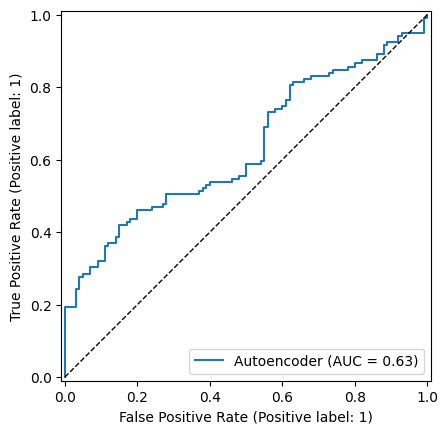

In [31]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_scores, name="Autoencoder")
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
# plt.title(f"Receiver operating characteristic (ROC) curve for {MACHINE}"); #Don't need the title because in the report we should add one too
# load the figure
file_path = os.path.join(output_dir, 'ROC_autoencoder.png')
plt.savefig(file_path, dpi=300)

## One-Class SVM and Isolation Forest

From the trained AutoEncoder, use the bottleneck features to train a (1) One-Class SVM and (2) Isolation Forest, and report the accuracy, F1-score and auc score of each method.

In [22]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

In [23]:
# Get normal training features
y_pred_train, extracted_features_train = test_loop(data_train, model, loss_fn)

### One-Class SVM

Accuracy: 0.47
False Positive Rate: 0.57
Recall: 0.50
F1: 0.50


0.4628991596638656

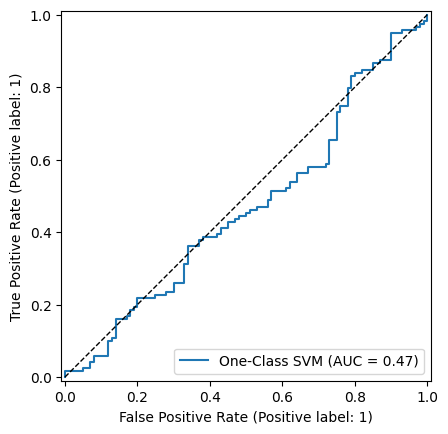

In [24]:
# TODO : Define the OneClassSVM here
# TODO : Fit OneClassSVM here using training data
# TODO : Report essential evaluation metrics
# ===================================
# IMPLEMENT YOUR CODE HERE

# OneClassSVM
clf = OneClassSVM(gamma='scale').fit(extracted_features_train) # 'scale' : automatically adjusts based on the data distribution
y_pred_clf = clf.predict(extracted_features_test)

# MACHINE = "valve_00" or "pump_04"
if MACHINE == "valve_00":
    predicted_score = np.array([0 if x == -1 else -1 for x in y_pred_clf])
elif MACHINE == "pump_04":
    predicted_score = np.array([x if x == -1 else 0 for x in y_pred_clf])

# metrics
accuracy_OneClassSVM = metrics.accuracy_score(y_true=y_true, y_pred=-predicted_score)
tn, fp, fn, tp = metrics.confusion_matrix(y_true, -predicted_score).ravel()
FPR_OneClassSVM = fp / (fp + tn)
recall_OneClassSVM = metrics.recall_score(y_true=y_true, y_pred=-predicted_score)
f1_OneClassSVM = metrics.f1_score(y_true=y_true, y_pred=-predicted_score)

# prints
print(f"Accuracy: {accuracy_OneClassSVM:.2f}")
print(f"False Positive Rate: {FPR_OneClassSVM:.2f}")
print(f"Recall: {recall_OneClassSVM:.2f}")
print(f"F1: {f1_OneClassSVM:.2f}")

# plot
if MACHINE == "valve_00":
    y_scores = clf.score_samples(extracted_features_test)
elif MACHINE == "pump_04":
    y_scores = -clf.score_samples(extracted_features_test)
RocCurveDisplay.from_predictions(y_true, y_scores, name="One-Class SVM")
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
# load the figure
file_path = os.path.join(output_dir, 'ROC_SVM_autoencoder_feature.png')
plt.savefig(file_path, dpi=300)
# ===================================
metrics.roc_auc_score(y_true, -predicted_score)

### Isolation Forest

Accuracy: 0.45
False Positive Rate: 0.55
Recall: 0.45
F1: 0.47


0.45189075630252096

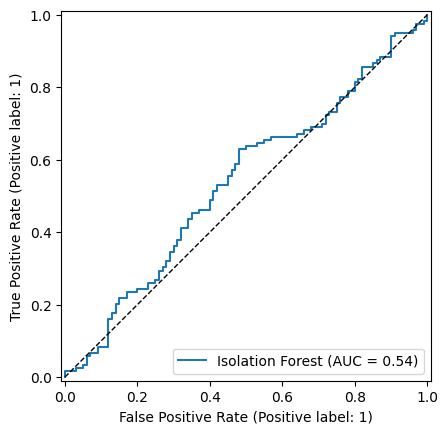

In [25]:
# TODO : Define IsolationForest here
# TODO : Fit IsolationForest here using training data
# TODO : Report essential evaluation metrics
# ===================================
# IMPLEMENT YOUR CODE HERE

# IsolationForest
clf = IsolationForest(contamination=0.5).fit(extracted_features_train) # the contamination is estimated based on the test dataset
y_pred_clf = clf.predict(extracted_features_test)

# MACHINE = "valve_00" or "pump_04"
if MACHINE == "valve_00":
    predicted_score = np.array([0 if x == -1 else -1 for x in y_pred_clf])
elif MACHINE == "pump_04":
    predicted_score = np.array([x if x == -1 else 0 for x in y_pred_clf])


# metrics
accuracy_IsolationForest = metrics.accuracy_score(y_true=y_true, y_pred=-predicted_score)
tn, fp, fn, tp = metrics.confusion_matrix(y_true, -predicted_score).ravel()
FPR_IsolationForest = fp / (fp + tn)
recall_IsolationForest = metrics.recall_score(y_true=y_true, y_pred=-predicted_score)
f1_IsolationForest = metrics.f1_score(y_true=y_true, y_pred=-predicted_score)

# prints
print(f"Accuracy: {accuracy_IsolationForest:.2f}")
print(f"False Positive Rate: {FPR_IsolationForest:.2f}")
print(f"Recall: {recall_IsolationForest:.2f}")
print(f"F1: {f1_IsolationForest:.2f}")

# plot
y_scores = np.abs(clf.score_samples(extracted_features_test))
RocCurveDisplay.from_predictions(y_true, y_scores, name="Isolation Forest")
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
# load the figure
file_path = os.path.join(output_dir, 'ROC_Forest_autoencoder_feature.png')
plt.savefig(file_path, dpi=300)

# ===================================
metrics.roc_auc_score(y_true, -predicted_score)

PCA of the spectrograms to reduce the input dimension

In [26]:
# Extract spectrograms of training and testing
flatten_spectogram_train = []
for idx, (x, _) in enumerate(data_train):
    x = x.flatten()
    flatten_spectogram_train.append(x.numpy())
train_spec = np.array(flatten_spectogram_train)

flatten_spectogram_test = []
for idx, (x, _) in enumerate(data_test):
    x = x.flatten()
    flatten_spectogram_test.append(x.numpy())
test_spec = np.array(flatten_spectogram_test)

Apply PCA to fit and transform the training data and transform also the test data

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=64)

# TODO : Fit and transform the training data (train_spec)
# TODO : Transform the testing data (test_spec)
# ===================================
# IMPLEMENT YOUR CODE HERE

print(train_spec.shape)
print(test_spec.shape)

x_train = pca.fit_transform(train_spec)
x_test = pca.transform(test_spec)

print(x_train.shape)
print(x_test.shape)

# ===================================

(891, 20032)
(219, 20032)
(891, 64)
(219, 64)


Apply OneClassSVM and IsolationForest on the new PCA features.

Accuracy: 0.58
False Positive Rate: 0.69
Recall: 0.81
F1: 0.68


0.5583613445378152

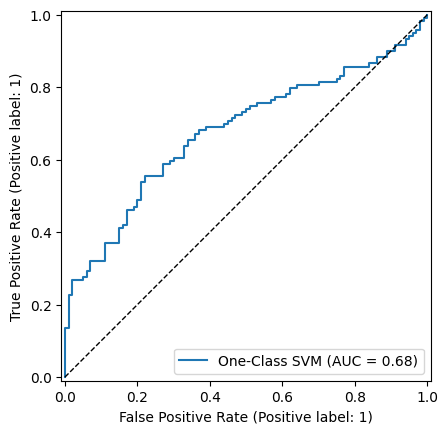

In [28]:
# TODO : Define the OneClassSVM here
# TODO : Fit OneClassSVM here using PCA features
# TODO : Report essential evaluation metrics
# ===================================
# IMPLEMENT YOUR CODE HERE

# OneClassSVM
clf = OneClassSVM(gamma='scale').fit(x_train) # train dataset
y_pred_clf = clf.predict(x_test)

# MACHINE = "valve_00" or "pump_04"
if MACHINE == "valve_00":
    predicted_score = np.array([0 if x == -1 else -1 for x in y_pred_clf])
elif MACHINE == "pump_04":
    predicted_score = np.array([x if x == -1 else 0 for x in y_pred_clf])


# metrics
accuracy_OneClassSVM = metrics.accuracy_score(y_true=y_true, y_pred=-predicted_score)
tn, fp, fn, tp = metrics.confusion_matrix(y_true, -predicted_score).ravel()
FPR_OneClassSVM = fp / (fp + tn)
recall_OneClassSVM = metrics.recall_score(y_true=y_true, y_pred=-predicted_score)
f1_OneClassSVM = metrics.f1_score(y_true=y_true, y_pred=-predicted_score)

# prints
print(f"Accuracy: {accuracy_OneClassSVM:.2f}")
print(f"False Positive Rate: {FPR_OneClassSVM:.2f}")
print(f"Recall: {recall_OneClassSVM:.2f}")
print(f"F1: {f1_OneClassSVM:.2f}")

# plot
if MACHINE == "valve_00":
    y_scores = clf.score_samples(x_test)
elif MACHINE == "pump_04":
    y_scores = -clf.score_samples(x_test)
RocCurveDisplay.from_predictions(y_true, y_scores, name="One-Class SVM")
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
# load the figure
file_path = os.path.join(output_dir, 'ROC_SVM_PCA_feature.png')
plt.savefig(file_path, dpi=300)

# ===================================

metrics.roc_auc_score(y_true, -predicted_score)

Accuracy: 0.59
False Positive Rate: 0.67
Recall: 0.81
F1: 0.68


0.5683613445378151

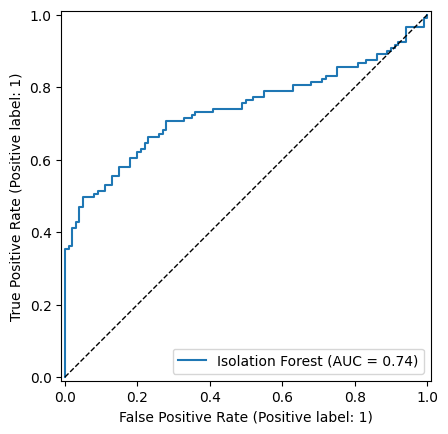

In [29]:
# TODO : Define IsolationForest here
# TODO : Fit IsolationForest here using PCA features
# TODO : Report essential evaluation metrics
# ===================================
# IMPLEMENT YOUR CODE HERE

# IsolationForest
clf = IsolationForest(contamination=0.5).fit(x_train) # train dataset
y_pred_clf = clf.predict(x_test)

# MACHINE = "valve_00" or "pump_04"
if MACHINE == "valve_00":
    predicted_score = np.array([0 if x == -1 else -1 for x in y_pred_clf])
elif MACHINE == "pump_04":
    predicted_score = np.array([x if x == -1 else 0 for x in y_pred_clf])


# metrics
accuracy_IsolationForest = metrics.accuracy_score(y_true=y_true, y_pred=-predicted_score)
tn, fp, fn, tp = metrics.confusion_matrix(y_true, -predicted_score).ravel()
FPR_IsolationForest = fp / (fp + tn)
recall_IsolationForest = metrics.recall_score(y_true=y_true, y_pred=-predicted_score)
f1_IsolationForest = metrics.f1_score(y_true=y_true, y_pred=-predicted_score)

# prints
print(f"Accuracy: {accuracy_IsolationForest:.2f}")
print(f"False Positive Rate: {FPR_IsolationForest:.2f}")
print(f"Recall: {recall_IsolationForest:.2f}")
print(f"F1: {f1_IsolationForest:.2f}")

# plot
if MACHINE == "valve_00":
    y_scores = clf.score_samples(x_test)
elif MACHINE == "pump_04":
    y_scores = -clf.score_samples(x_test)
RocCurveDisplay.from_predictions(y_true, y_scores, name="Isolation Forest")
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
# load the figure
file_path = os.path.join(output_dir, 'ROC_Forest_PCA_feature.png')
plt.savefig(file_path, dpi=300)

# ===================================

metrics.roc_auc_score(y_true, -predicted_score)